In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os
import re

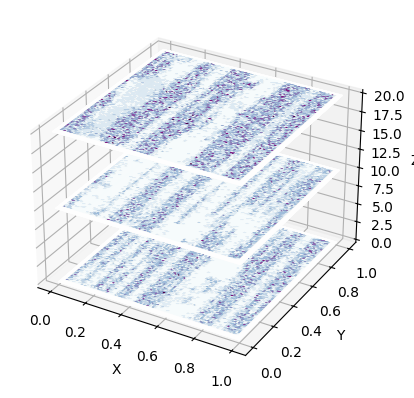

In [16]:
# Load images with specific pattern
folder_path = '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper'
image_paths = []

# Search for images matching the pattern and sort them
for filename in os.listdir(folder_path):
    match = re.match(r'heatmap_panel_([a-zA-Z0-9]+)\.png', filename)
    if match:
        image_paths.append(os.path.join(folder_path, filename))

# Sort image_paths based on the numerical part in the filename
image_paths.sort(key=lambda x: int(re.search(r'heatmap_panel_([a-zA-Z0-9]+)\.png', x).group(1)))

# Load images
images = [Image.open(img_path) for img_path in image_paths]

# Convert images to arrays
image_arrays = [np.array(img) for img in images]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each image at a different z-coordinate
z_positions = range(0, 10 * len(image_arrays), 10)  # Adjust z distance as needed
for z, img_array in zip(z_positions, image_arrays):
    x = np.linspace(0, 1, img_array.shape[1])
    y = np.linspace(0, 1, img_array.shape[0])
    x, y = np.meshgrid(x, y)
    z_matrix = np.full_like(x, z)  # Create a 2D array with the same shape as x and y, filled with the z value
    ax.plot_surface(x, y, z_matrix, rstride=1, cstride=1, facecolors=img_array / 255.0, shade=False)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


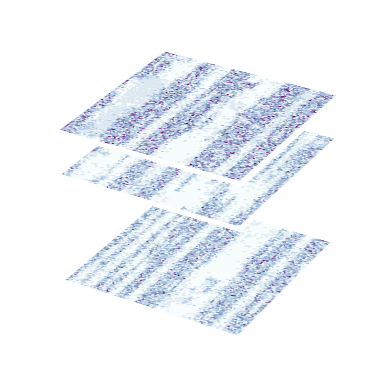

In [29]:
# Load images with specific pattern
folder_path = '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper'
image_paths = []

# Search for images matching the pattern and sort them
for filename in os.listdir(folder_path):
    match = re.match(r'heatmap_panel_([a-zA-Z0-9]+)\.png', filename)
    if match:
        image_paths.append(os.path.join(folder_path, filename))

# Sort image_paths based on the numerical part in the filename
image_paths.sort(key=lambda x: int(re.search(r'heatmap_panel_([a-zA-Z0-9]+)\.png', x).group(1)))

# Load images
images = [Image.open(img_path) for img_path in image_paths]

# Convert images to arrays
image_arrays = [np.array(img) for img in images]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Customize z-positions
z_positions = [0, 50, 70]  # First image at z=0, second at z=20, third at z=60 ...

# Plot each image at a different z-coordinate
for z, img_array in zip(z_positions, image_arrays):
    x = np.linspace(0, 1, img_array.shape[1])
    y = np.linspace(0, 1, img_array.shape[0])
    x, y = np.meshgrid(x, y)
    z_matrix = np.full_like(x, z)  # Create a 2D array with the same shape as x and y, filled with the z value
    ax.plot_surface(x, y, z_matrix, rstride=1, cstride=1, facecolors=img_array / 255.0, shade=False)

# Remove axes and grid
ax.set_axis_off()
ax.grid(False)

# # Change the viewing angle
# ax.view_init(elev=20, azim=30)

# Save the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/3d_plot_HR.png', dpi=300) 

plt.show()


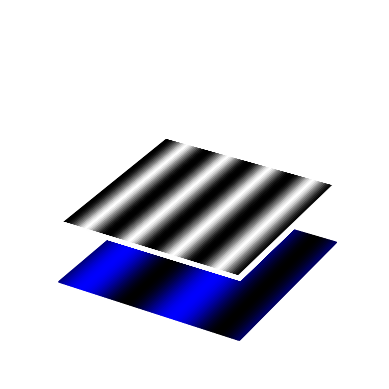

In [33]:
# Load images with specific pattern
folder_path = '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/env_dev'
image_paths = []

# Search for images matching the pattern and sort them
for filename in os.listdir(folder_path):
    match = re.match(r'heatmap_panel_([a-zA-Z0-9]+)\.png', filename)
    if match:
        image_paths.append(os.path.join(folder_path, filename))

# Sort image_paths based on the numerical part in the filename
image_paths.sort(key=lambda x: int(re.search(r'heatmap_panel_([a-zA-Z0-9]+)\.png', x).group(1)))

# Load images
images = [Image.open(img_path) for img_path in image_paths]

# Convert images to arrays
image_arrays = [np.array(img) for img in images]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Customize z-positions
z_positions = [0, 20, 70]  # First image at z=0, second at z=20, third at z=60 ...

# Plot each image at a different z-coordinate
for z, img_array in zip(z_positions, image_arrays):
    x = np.linspace(0, 1, img_array.shape[1])
    y = np.linspace(0, 1, img_array.shape[0])
    x, y = np.meshgrid(x, y)
    z_matrix = np.full_like(x, z)  # Create a 2D array with the same shape as x and y, filled with the z value
    ax.plot_surface(x, y, z_matrix, rstride=1, cstride=1, facecolors=img_array / 255.0, shade=False)

# Remove axes and grid
ax.set_axis_off()
ax.grid(False)

ax.set_zlim(0, 50)
# # Change the viewing angle
# ax.view_init(elev=20, azim=30)

# Save the figure
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/3d_plot_env_HR.png', dpi=300) 

plt.show()


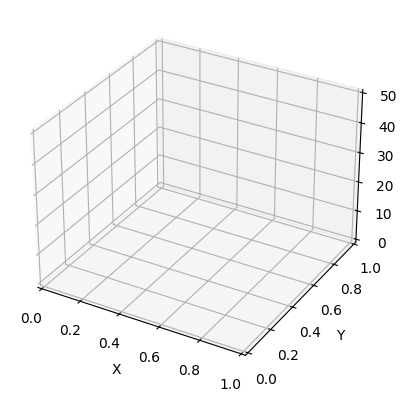

In [27]:
# Create a empty figure so I can play around with the azimut and understand the point of view at which the plot is displayed
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Set labels (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_zlim(0, 50)

# Change the viewing angle
# ax.view_init(elev=50, azim=30)

# Display the plot
plt.show()